## Intent Classification of User Instructions for Home Automation

This Jupyter Notebook implements a model for intent classification based on user instructions for home automation.

In [3]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/kaggle/input/home-automation-intent-classification/intent_datasets.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())


First few rows of the dataset:
                                                text         intent
0     It's time to connect, switch on the multiplug.   multiplug_on
1          I want to feel a breeze, turn on the fan.         fan_on
2           Please deactivate the AC in the bedroom.         ac_off
3  Turn off the multiplug, I don't need any appli...  multiplug_off
4     It's stuffy in here, can you turn on the vent?        vent_on

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    140 non-null    object
 1   intent  140 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB
None

Statistical summary of the dataset:
                                                     text        intent
count                                                 140           140
unique                                                1

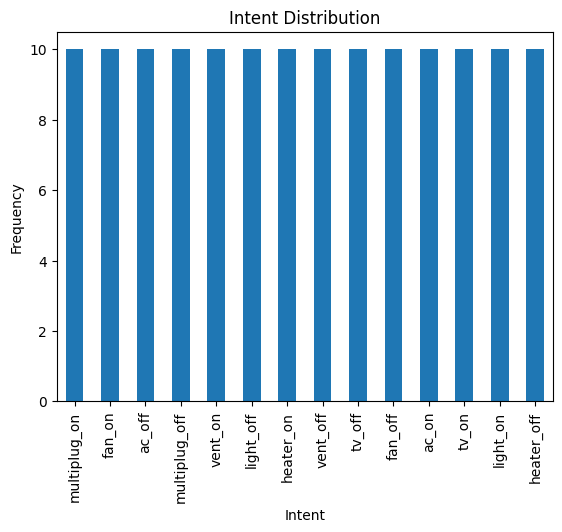

In [4]:
# Visualize the dataset 
import matplotlib.pyplot as plt
df['intent'].value_counts().plot(kind='bar')
plt.title('Intent Distribution')
plt.xlabel('Intent')
plt.ylabel('Frequency')
plt.show()

In [5]:
df.head(25)

,text,intent
0,"It's time to connect, switch on the multiplug.",multiplug_on
1,"I want to feel a breeze, turn on the fan.",fan_on
2,Please deactivate the AC in the bedroom.,ac_off
3,"Turn off the multiplug, I don't need any appli...",multiplug_off
4,"It's stuffy in here, can you turn on the vent?",vent_on
5,"It's too bright, can you dim the lights?",light_off
6,Please switch on the heater in the living room.,heater_on
7,"Switch on the fan, it's getting hot.",fan_on
8,"Time to plug in, turn on the multiplug.",multiplug_on
9,"Turn on the multiplug, I need to use some appl...",multiplug_on


## Preprocessing of the datasets

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

# Define custom stopword list
custom_stopwords = {'on', 'off'}  # Add other relevant words as needed
# Define custom phrases to remove
custom_stopwords_phrases = {'living','room','bedroom','office','please','time'}  # Add other phrases as needed

def preprocess_text(text):
    # Expand contractions
    contractions = {
        "n't": "not",
        "'s": "is",
        "'m": "am",
        "'re": "are",
        "'ll": "will",
        "'ve": "have",
        "'d": "would"
    }
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token.strip(string.punctuation) for token in tokens]
    
    # Expand contractions
    tokens = [contractions[token] if token in contractions else token for token in tokens]
    
    # Remove stopwords (excluding custom stopwords)
    stop_words = set(stopwords.words('english')) - custom_stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove custom phrases
    tokens = [token for token in tokens if token not in custom_stopwords_phrases]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Example usage
text = "Can you adjust the fan speed to high?"
preprocessed_text = preprocess_text(text)
print("Preprocessed text:", preprocessed_text)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Preprocessed text: adjust fan speed high 


In [7]:
# Preprocess each text in the dataset
preprocessed_texts = [preprocess_text(text) for text in df['text']]

# Display the preprocessed texts along with their intents
for i, (preprocessed_text, intent) in enumerate(zip(preprocessed_texts, df['intent'])):
    print(f"Preprocessed text {i + 1}: {preprocessed_text} (Intent: {intent})")

Preprocessed text 1: connect  switch on multiplug  (Intent: multiplug_on)
Preprocessed text 2: want feel breeze  turn on fan  (Intent: fan_on)
Preprocessed text 3: deactivate ac  (Intent: ac_off)
Preprocessed text 4: turn off multiplug  need appliances  (Intent: multiplug_off)
Preprocessed text 5: stuffy  turn on vent  (Intent: vent_on)
Preprocessed text 6: bright  dim lights  (Intent: light_off)
Preprocessed text 7: switch on heater  (Intent: heater_on)
Preprocessed text 8: switch on fan  getting hot  (Intent: fan_on)
Preprocessed text 9: plug  turn on multiplug  (Intent: multiplug_on)
Preprocessed text 10: turn on multiplug  need use appliances  (Intent: multiplug_on)
Preprocessed text 11: deactivate multiplug   (Intent: multiplug_off)
Preprocessed text 12: close vent prevent drafts  (Intent: vent_off)
Preprocessed text 13: adjust fan speed high  (Intent: fan_on)
Preprocessed text 14: switch off lights  leaving  (Intent: light_off)
Preprocessed text 15: sleep  turn off tv  (Intent: t

In [8]:
# Preprocess text and add it as a new column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

## train_test_split

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
train_texts, test_texts, train_intents, test_intents = train_test_split(df['preprocessed_text'], df['intent'], test_size=0.2, random_state=42)

# Optional: You can further split the training set into validation and training sets if needed
# train_texts, val_texts, train_intents, val_intents = train_test_split(train_texts, train_intents, test_size=0.1, random_state=42)

# Check the shapes of the resulting arrays
print("Training set shape (texts):", train_texts.shape)
print("Testing set shape (texts):", test_texts.shape)
print("Training set shape (intents):", train_intents.shape)
print("Testing set shape (intents):", test_intents.shape)


Training set shape (texts): (112,)
Testing set shape (texts): (28,)
Training set shape (intents): (112,)
Testing set shape (intents): (28,)


## TF-IDF Vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def tfidf_vectorize(train_texts, test_texts):
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit-transform on training data
    train_tfidf = tfidf_vectorizer.fit_transform(train_texts)

    # Transform test data (using the same vocabulary learned from training data)
    test_tfidf = tfidf_vectorizer.transform(test_texts)
    
    return train_tfidf, test_tfidf, tfidf_vectorizer

# Assuming train_texts and test_texts are lists of preprocessed texts
train_tfidf, test_tfidf, tfidf_vectorizer = tfidf_vectorize(train_texts, test_texts)


In [11]:
# Check the shape of the resulting TF-IDF matrices
print("Shape of TF-IDF matrix for training data:", train_tfidf.shape)
print("Shape of TF-IDF matrix for testing data:", test_tfidf.shape)

Shape of TF-IDF matrix for training data: (112, 108)
Shape of TF-IDF matrix for testing data: (28, 108)


In [12]:
print(train_tfidf[:2])

  (0, 56)	0.6960059930650715
  (0, 67)	0.4376916584188646
  (0, 89)	0.5692114455701394
  (1, 68)	0.2062117718085216
  (1, 92)	0.16061257850655639
  (1, 93)	0.6183514645713446
  (1, 104)	0.4739798079355485
  (1, 78)	0.4739798079355485
  (1, 101)	0.31624050087599426


In [13]:
print(test_tfidf[:2])

  (0, 92)	0.24503209001007056
  (0, 68)	0.31459865659811426
  (0, 47)	0.47168146210453754
  (0, 43)	0.7864499719873378
  (1, 93)	0.47665894293654004
  (1, 92)	0.24761782345358743
  (1, 89)	0.3898238357948681
  (1, 67)	0.29975265344385016
  (1, 42)	0.6853228359147789


In [14]:
# Convert TF-IDF matrices to arrays
train_tfidf_array = train_tfidf.toarray()
test_tfidf_array = test_tfidf.toarray()

# Print the shape of the arrays
print("Shape of TF-IDF array for training data:", train_tfidf_array.shape)
print("Shape of TF-IDF array for testing data:", test_tfidf_array.shape)

# Print the first few vectors
print("First few vectors in the training data:")
print(train_tfidf_array[:2])

print("First few vectors in the testing data:")
print(test_tfidf_array[:2])

Shape of TF-IDF array for training data: (112, 108)
Shape of TF-IDF array for testing data: (28, 108)
First few vectors in the training data:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.69600599 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.43769166 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.   

In [15]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Convert pandas Series to numpy array
train_intents_array = train_intents.to_numpy().reshape(-1, 1)
test_intents_array = test_intents.to_numpy().reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  

# Fit and transform on training intents
train_intents_encoded = encoder.fit_transform(train_intents_array)
    
# Transform testing intents
test_intents_encoded = encoder.transform(test_intents_array)
    

In [16]:
print("Encoded training intents:\n", train_intents_encoded[:5])
print("\nEncoded testing intents:\n", test_intents_encoded[:5])


Encoded training intents:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Encoded testing intents:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [17]:
# Reshape train and test TF-IDF arrays to include timestep dimension
train_tfidf_array_reshaped = train_tfidf_array.reshape(train_tfidf_array.shape[0], 1, train_tfidf_array.shape[1])
test_tfidf_array_reshaped = test_tfidf_array.reshape(test_tfidf_array.shape[0], 1, test_tfidf_array.shape[1])

In [18]:
print(train_tfidf_array_reshaped[:2])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.69600599 0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.43769166 0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.56921145
   0.         0.         0.         0.         0.         0.
   0.         0.

In [19]:
print(test_tfidf_array_reshaped[:2])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.78644997 0.         0.         0.         0.47168146
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.31459866 0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.24503209 0.         0.         0.
   0.         0.

## Baseline model with LSTM

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the LSTM model
def create_lstm_model(vocab_size, num_classes, lstm_units):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(None, vocab_size)))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Parameters
vocabulary = tfidf_vectorizer.vocabulary_
# Size of vocabulary obtained from vectorization
vocab_size = len(vocabulary)
num_classes = len(np.unique(train_intents))  # Number of unique intent classes
lstm_units = 128  # Number of LSTM units

# Create the LSTM model
model = create_lstm_model(vocab_size, num_classes, lstm_units)
#summary
model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_tfidf_array_reshaped, train_intents_encoded, validation_data=(test_tfidf_array_reshaped, test_intents_encoded), batch_size=16, epochs=75)

# Evaluate the model
loss, accuracy = model.evaluate(test_tfidf_array_reshaped, test_intents_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               121344    
                                                                 
 dense (Dense)               (None, 14)                1806      
                                                                 
Total params: 123150 (481.05 KB)
Trainable params: 123150 (481.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/75
1/7 [===>..........................] - ETA: 14s - loss: 2.6430 - accuracy: 0.0000e+00

I0000 00:00:1708405361.156093     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 [==============================] - 3s 94ms/step - loss: 2.6346 - accuracy: 0.0893 - val_loss: 2.6326 - val_accuracy: 0.1071
Epoch 2/75
7/7 [==============================] - 0s 9ms/step - loss: 2.6164 - accuracy: 0.3214 - val_loss: 2.6233 - val_accuracy: 0.1786
Epoch 3/75
7/7 [==============================] - 0s 8ms/step - loss: 2.5993 - accuracy: 0.5536 - val_loss: 2.6152 - val_accuracy: 0.3214
Epoch 4/75
7/7 [==============================] - 0s 9ms/step - loss: 2.5815 - accuracy: 0.6518 - val_loss: 2.6061 - val_accuracy: 0.3214
Epoch 5/75
7/7 [==============================] - 0s 9ms/step - loss: 2.5633 - accuracy: 0.7411 - val_loss: 2.5962 - val_accuracy: 0.3929
Epoch 6/75
7/7 [==============================] - 0s 9ms/step - loss: 2.5433 - accuracy: 0.8304 - val_loss: 2.5850 - val_accuracy: 0.3929
Epoch 7/75
7/7 [==============================] - 0s 11ms/step - loss: 2.5226 - accuracy: 0.8482 - val_loss: 2.5735 - val_accuracy: 0.3929
Epoch 8/75
7/7 [===========================

## Training and Validation Loss over Epochs

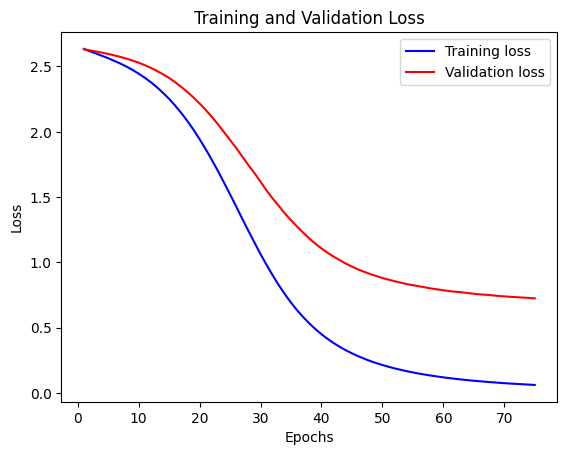

In [21]:
import matplotlib.pyplot as plt

# Get the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training and Validation Accuracy over Epochs

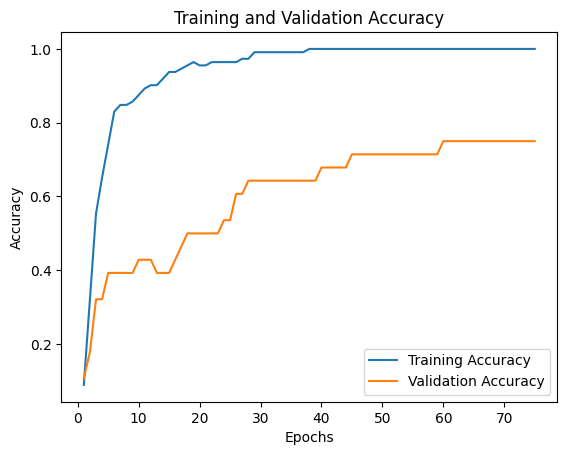

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
def preprocess_test_data(test_texts):
    # Perform preprocessing on test data (e.g., tokenization, vectorization)
    # Example: test_data = preprocess_text(test_data)
    preprocessed_test_data = []
    for test_text in test_texts:
        preprocessed_test_text = preprocess_text(test_text)  # Assuming preprocess_text function is defined
        preprocessed_test_data.append(preprocessed_test_text)
    return preprocessed_test_data

def predict_intent_on_test_data(test_texts):
    # Preprocess the test data
    preprocessed_test_data = preprocess_test_data(test_texts)
    
    # Vectorize the preprocessed test data using TF-IDF vectorizer
    test_vector = tfidf_vectorizer.transform(preprocessed_test_data)
    
    # Convert TF-IDF matrices to arrays
    test_vector_array = test_vector.toarray()
    
    # Reshape the vectorized test data to match the model's input shape
    test_vector_array_reshaped = test_vector_array.reshape(len(test_texts), 1, -1)  # Reshape for LSTM input shape
    
    # Make predictions on the test data using the model
    predictions = model.predict(test_vector_array_reshaped)
    
    # Convert predictions to human-readable intent classes
    predicted_class_indices = np.argmax(predictions, axis=1)
    predicted_intents = encoder.inverse_transform(predictions)
    
    return predicted_intents, predicted_class_indices

# Reset the indices of test_intents
test_intents = test_intents.reset_index(drop=True)

# Example usage for testing inference on test data
predicted_intents, predicted_class_indices = predict_intent_on_test_data(test_texts)

1/1 [==============================] - 0s 423ms/step


## Classification Report

In [24]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(test_intents, predicted_intents))


               precision    recall  f1-score   support

       ac_off       1.00      1.00      1.00         2
        ac_on       0.00      0.00      0.00         1
      fan_off       0.67      1.00      0.80         2
       fan_on       0.00      0.00      0.00         2
   heater_off       1.00      0.67      0.80         3
    heater_on       0.67      1.00      0.80         2
    light_off       0.00      0.00      0.00         0
     light_on       1.00      1.00      1.00         2
multiplug_off       1.00      1.00      1.00         2
 multiplug_on       1.00      1.00      1.00         1
       tv_off       1.00      1.00      1.00         2
        tv_on       1.00      0.75      0.86         4
     vent_off       0.33      1.00      0.50         1
      vent_on       0.50      0.50      0.50         4

     accuracy                           0.75        28
    macro avg       0.65      0.71      0.66        28
 weighted avg       0.75      0.75      0.73        28



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

## Confusion Matrix

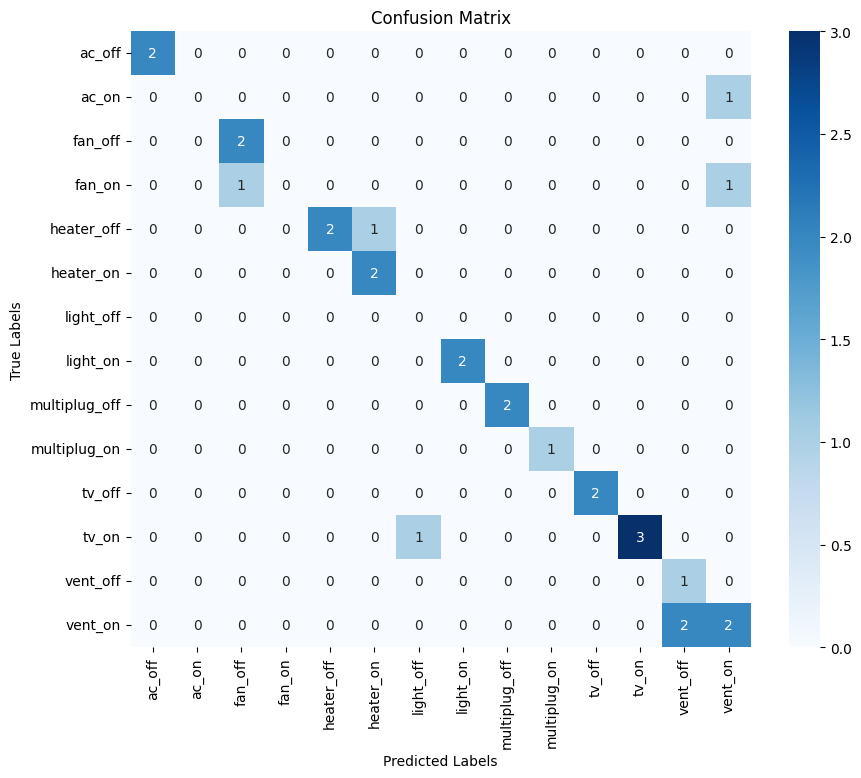

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Define the intent labels
intents = ['ac_off', 'ac_on', 'fan_off','fan_on','heater_off','heater_on','light_off','light_on','multiplug_off','multiplug_on','tv_off','tv_on','vent_off','vent_on']

# Plot the confusion matrix
plot_confusion_matrix(test_intents, predicted_intents, labels=intents)

In [26]:
del model

## Baseline Model with L2 Regularization to overcome Overfitting 

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.regularizers import l2

# Define the LSTM model with L2 regularization
def create_lstm_model_with_regularization(vocab_size, num_classes, lstm_units, l2_penalty):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(None, vocab_size), kernel_regularizer=l2(l2_penalty)))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Parameters
vocabulary = tfidf_vectorizer.vocabulary_
# Size of vocabulary obtained from vectorization
vocab_size = len(vocabulary)
num_classes = len(np.unique(train_intents))  # Number of unique intent classes
lstm_units = 128  # Number of LSTM units
l2_penalty = 0.01  # L2 regularization penalty strength

# Create the LSTM model with L2 regularization
model = create_lstm_model_with_regularization(vocab_size, num_classes, lstm_units, l2_penalty)
#summary
model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_tfidf_array_reshaped, train_intents_encoded, validation_data=(test_tfidf_array_reshaped, test_intents_encoded), batch_size=16, epochs=80)

# Evaluate the model
loss, accuracy = model.evaluate(test_tfidf_array_reshaped, test_intents_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               121344    
                                                                 
 dense_1 (Dense)             (None, 14)                1806      
                                                                 
Total params: 123150 (481.05 KB)
Trainable params: 123150 (481.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
7/7 [==============================] - 2s 91ms/step - loss: 4.2776 - accuracy: 0.0982 - val_loss: 4.0823 - val_accuracy: 0.0357
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 3.9463 - accuracy: 0.2054 - val_loss: 3.7860 - val_accuracy: 0.0357
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 3.6681 - accuracy: 0.3482 - val_loss: 3.5392 - val_accuracy: 0.

## Training and Validation Loss over Epochs

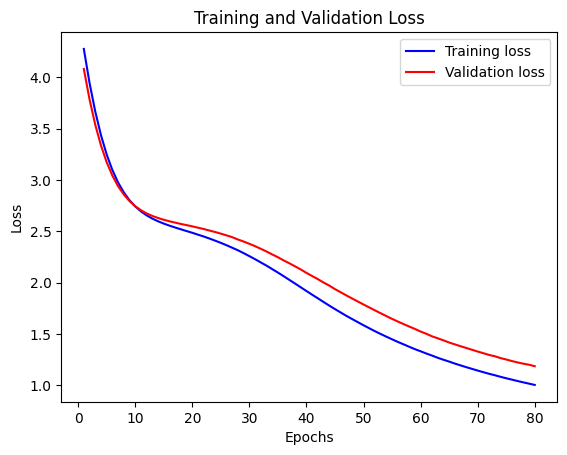

In [29]:
import matplotlib.pyplot as plt

# Get the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training and Validation Accuracy over Epochs

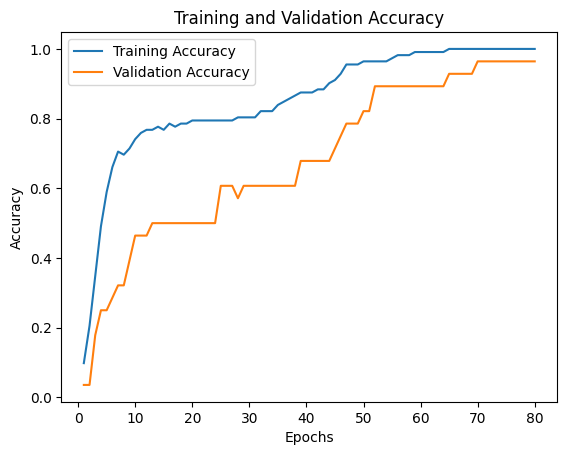

In [30]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# Example usage for testing inference on test data
predicted_intents, predicted_class_indices = predict_intent_on_test_data(test_texts)

1/1 [==============================] - 0s 360ms/step


## Classification Report

In [32]:
# Print the classification report
print(classification_report(test_intents, predicted_intents))


               precision    recall  f1-score   support

       ac_off       1.00      1.00      1.00         2
        ac_on       1.00      1.00      1.00         1
      fan_off       0.67      1.00      0.80         2
       fan_on       1.00      0.50      0.67         2
   heater_off       1.00      1.00      1.00         3
    heater_on       1.00      1.00      1.00         2
     light_on       1.00      1.00      1.00         2
multiplug_off       1.00      1.00      1.00         2
 multiplug_on       1.00      1.00      1.00         1
       tv_off       1.00      1.00      1.00         2
        tv_on       1.00      1.00      1.00         4
     vent_off       1.00      1.00      1.00         1
      vent_on       1.00      1.00      1.00         4

     accuracy                           0.96        28
    macro avg       0.97      0.96      0.96        28
 weighted avg       0.98      0.96      0.96        28



## Confusion Matrix

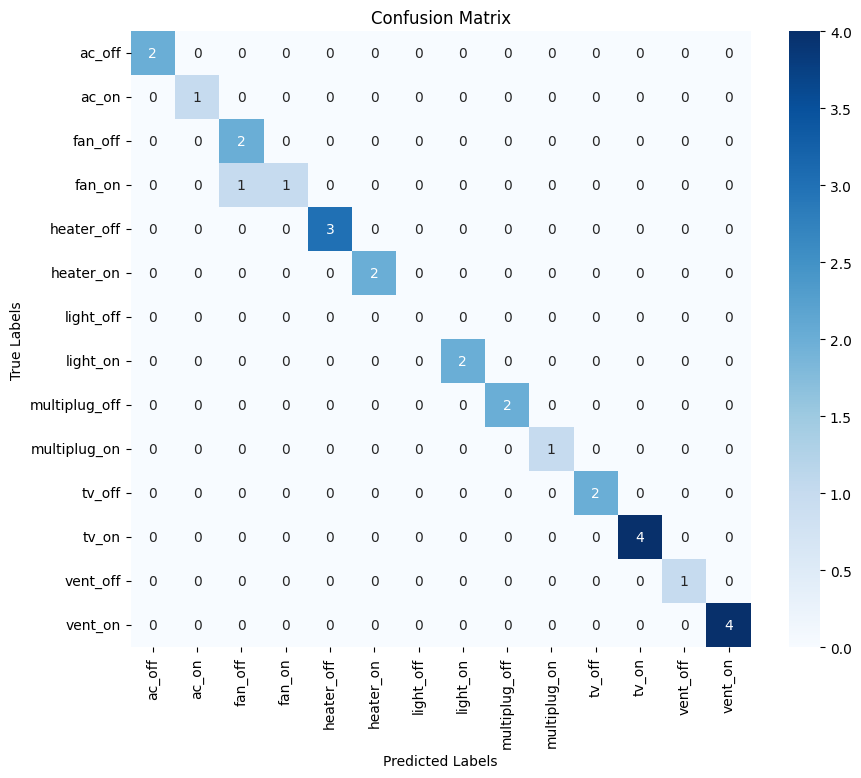

In [33]:
# Plot the confusion matrix
plot_confusion_matrix(test_intents, predicted_intents, labels=intents)

In [61]:
del model

## Baseline Model with Dropout

In [62]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Define the LSTM model with dropout
def create_lstm_model_with_dropout(vocab_size, num_classes, lstm_units, dropout_rate):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(None, vocab_size)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Parameters
vocabulary = tfidf_vectorizer.vocabulary_
# Size of vocabulary obtained from vectorization
vocab_size = len(vocabulary)
num_classes = len(np.unique(train_intents))  # Number of unique intent classes
lstm_units = 128  # Number of LSTM units
dropout_rate = 0.5  # Dropout rate

# Create the LSTM model with L2 regularization and dropout
model = create_lstm_model_with_dropout(vocab_size, num_classes, lstm_units, dropout_rate)
# Summary
model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_tfidf_array_reshaped, train_intents_encoded, validation_data=(test_tfidf_array_reshaped, test_intents_encoded), batch_size=16, epochs=80)

# Evaluate the model
loss, accuracy = model.evaluate(test_tfidf_array_reshaped, test_intents_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 128)               121344    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 14)                1806      
                                                                 
Total params: 123150 (481.05 KB)
Trainable params: 123150 (481.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
7/7 [==============================] - 2s 83ms/step - loss: 2.6408 - accuracy: 0.0625 - val_loss: 2.6358 - val_accuracy: 0.0357
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 2.6245 - accuracy: 0.1786 - val_loss: 2.6291 - val_accuracy: 0.1071
E

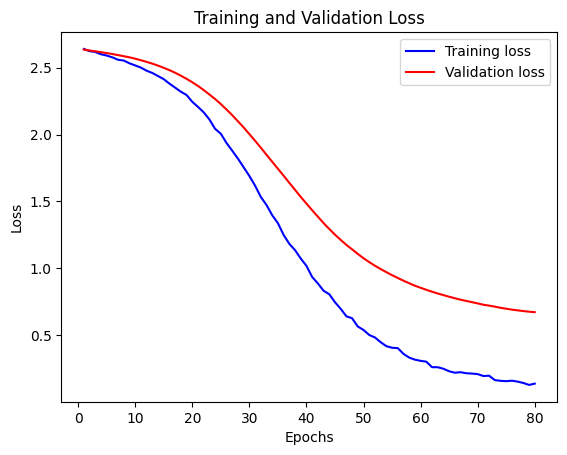

In [63]:
import matplotlib.pyplot as plt

# Get the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

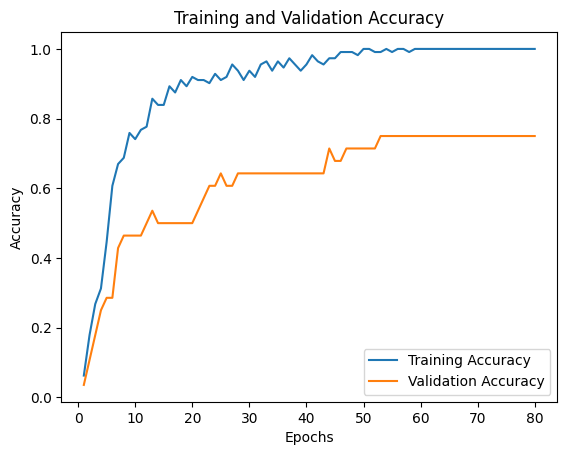

In [64]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Only using the Dropout will not overcome an issue of overfitting, let's add regulatization along with dropout in the next iteration.

In [65]:
del model

## Baseline Model with Regularization and Dropout

In [66]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2

# Define the LSTM model with L2 regularization and dropout
def create_lstm_model_with_regularization_and_dropout(vocab_size, num_classes, lstm_units, l2_penalty, dropout_rate):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(None, vocab_size), kernel_regularizer=l2(l2_penalty)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Parameters
vocabulary = tfidf_vectorizer.vocabulary_
# Size of vocabulary obtained from vectorization
vocab_size = len(vocabulary)
num_classes = len(np.unique(train_intents))  # Number of unique intent classes
lstm_units = 128  # Number of LSTM units
l2_penalty = 0.01  # L2 regularization penalty strength
dropout_rate = 0.2  # Dropout rate

# Create the LSTM model with L2 regularization and dropout
model = create_lstm_model_with_regularization_and_dropout(vocab_size, num_classes, lstm_units, l2_penalty, dropout_rate)
# Summary
model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_tfidf_array_reshaped, train_intents_encoded, validation_data=(test_tfidf_array_reshaped, test_intents_encoded), batch_size=16, epochs=80)

# Evaluate the model
loss, accuracy = model.evaluate(test_tfidf_array_reshaped, test_intents_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 128)               121344    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 14)                1806      
                                                                 
Total params: 123150 (481.05 KB)
Trainable params: 123150 (481.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
7/7 [==============================] - 2s 83ms/step - loss: 4.2758 - accuracy: 0.1250 - val_loss: 4.0811 - val_accuracy: 0.2143
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 3.9452 - accuracy: 0.2411 - val_loss: 3.7858 - val_accuracy: 0.2500


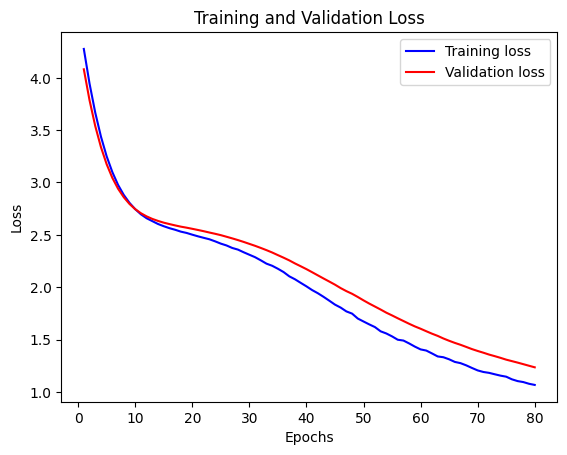

In [67]:
import matplotlib.pyplot as plt

# Get the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

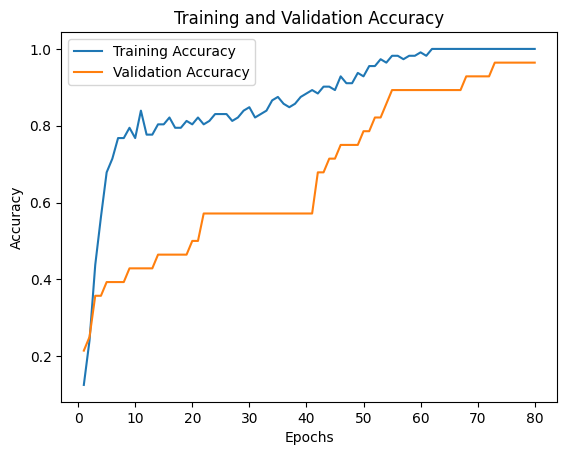

In [68]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
def preprocess_test_data(test_texts):
    # Perform preprocessing on test data (e.g., tokenization, vectorization)
    # Example: test_data = preprocess_text(test_data)
    preprocessed_test_data = []
    for test_text in test_texts:
        preprocessed_test_text = preprocess_text(test_text)  # Assuming preprocess_text function is defined
        preprocessed_test_data.append(preprocessed_test_text)
    return preprocessed_test_data

def predict_intent_on_test_data(test_texts):
    # Preprocess the test data
    preprocessed_test_data = preprocess_test_data(test_texts)
    
    # Vectorize the preprocessed test data using TF-IDF vectorizer
    test_vector = tfidf_vectorizer.transform(preprocessed_test_data)
    
    # Convert TF-IDF matrices to arrays
    test_vector_array = test_vector.toarray()
    
    # Reshape the vectorized test data to match the model's input shape
    test_vector_array_reshaped = test_vector_array.reshape(len(test_texts), 1, -1)  # Reshape for LSTM input shape
    
    # Make predictions on the test data using the model
    predictions = model.predict(test_vector_array_reshaped)
    
    # Convert predictions to human-readable intent classes
    predicted_class_indices = np.argmax(predictions, axis=1)
    predicted_intents = encoder.inverse_transform(predictions)
    
    return predicted_intents, predicted_class_indices

# Reset the indices of test_intents
test_intents = test_intents.reset_index(drop=True)

# Example usage for testing inference on test data
predicted_intents, predicted_class_indices = predict_intent_on_test_data(test_texts)

# Print the predictions
for i, test_input in enumerate(test_texts):
    predicted_intent = predicted_intents[i][0]  # Extract predicted intent
    actual_intent = test_intents[i]  # Access intents using sequential indices
    predicted_class_index = predicted_class_indices[i]
    print("Test Input:", test_input)
    print("Actual Intent:", actual_intent)  # Print the actual intent
    print("Predicted Intent:", predicted_intent, "Predicted Class Index:", predicted_class_index)
    print()

1/1 [==============================] - 0s 340ms/step
Test Input: freezing  turn on heater 
Actual Intent: heater_on
Predicted Intent: heater_on Predicted Class Index: 5

Test Input: flip switch turn off tv 
Actual Intent: tv_off
Predicted Intent: tv_off Predicted Class Index: 10

Test Input: switch off multiplug 
Actual Intent: multiplug_off
Predicted Intent: multiplug_off Predicted Class Index: 8

Test Input: switch on ac  getting humid 
Actual Intent: ac_on
Predicted Intent: ac_on Predicted Class Index: 1

Test Input: turn on vent bathroom 
Actual Intent: vent_on
Predicted Intent: vent_on Predicted Class Index: 13

Test Input: adjust fan speed high 
Actual Intent: fan_on
Predicted Intent: fan_off Predicted Class Index: 2

Test Input: activate tv  
Actual Intent: tv_on
Predicted Intent: tv_on Predicted Class Index: 11

Test Input: brighten space  turn on lights 
Actual Intent: light_on
Predicted Intent: light_on Predicted Class Index: 7

Test Input: activate ventilation kitchen 
Actua

In [70]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(test_intents, predicted_intents))


               precision    recall  f1-score   support

       ac_off       1.00      1.00      1.00         2
        ac_on       1.00      1.00      1.00         1
      fan_off       0.67      1.00      0.80         2
       fan_on       1.00      0.50      0.67         2
   heater_off       1.00      1.00      1.00         3
    heater_on       1.00      1.00      1.00         2
     light_on       1.00      1.00      1.00         2
multiplug_off       1.00      1.00      1.00         2
 multiplug_on       1.00      1.00      1.00         1
       tv_off       1.00      1.00      1.00         2
        tv_on       1.00      1.00      1.00         4
     vent_off       1.00      1.00      1.00         1
      vent_on       1.00      1.00      1.00         4

     accuracy                           0.96        28
    macro avg       0.97      0.96      0.96        28
 weighted avg       0.98      0.96      0.96        28



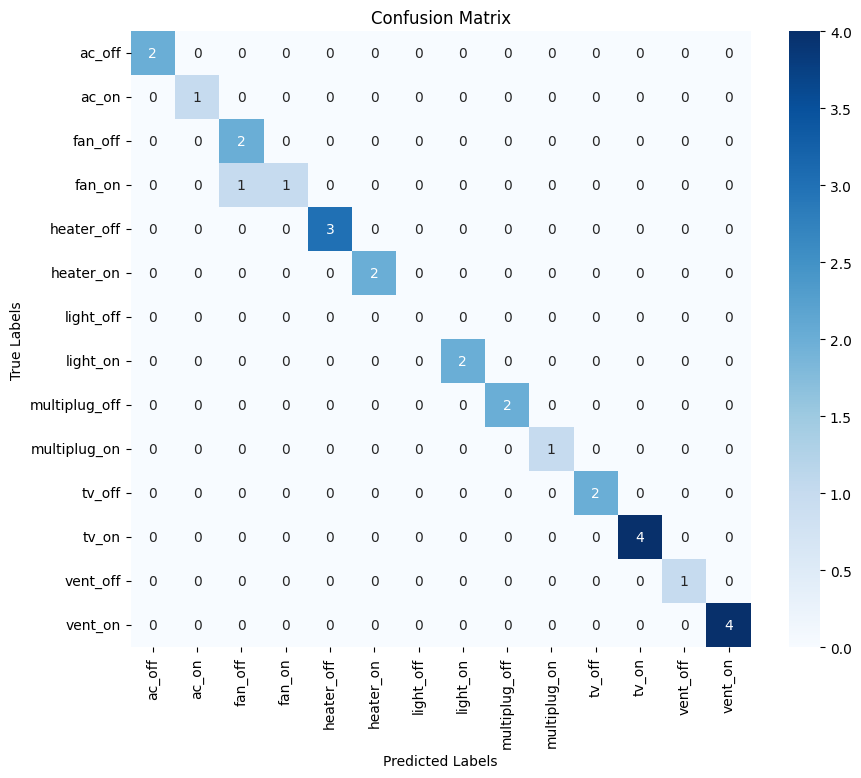

In [71]:
# Plot the confusion matrix
plot_confusion_matrix(test_intents, predicted_intents, labels=intents)

In [72]:
def preprocess_input(user_input):
    # Perform preprocessing on user input here
    # Example: tokenization, vectorization, etc.
    preprocessed_input = preprocess_text(user_input)  # Assuming preprocess_text function is defined
    
    return preprocessed_input

def predict_intent(user_input):
    # Preprocess the user input
    preprocessed_input = preprocess_input(user_input)
    
    # Vectorize the preprocessed input using TF-IDF vectorizer
    input_vector = tfidf_vectorizer.transform([preprocessed_input])
    
    # Convert TF-IDF matrices to arrays
    input_vector_array= input_vector.toarray()
    
    # Reshape the vectorized input to match the model's input shape
    input_vector_array_reshaped = input_vector_array.reshape(1, 1, -1)  # Reshape for LSTM input shape
    
    # Make predictions using the model
    predictions = model.predict(input_vector_array_reshaped)
    
    # Convert predictions to human-readable intent classes
    predicted_class_index = np.argmax(predictions)

    predicted_intent = encoder.inverse_transform(predictions)[0][0]

    return predicted_intent, predicted_class_index 

# Example usage
user_input = input("Please enter your query: ")
predicted_intent, predicted_class_index = predict_intent(user_input)
print("Predicted intent:", predicted_intent, "Predicted class:", predicted_class_index)

Please enter your query:  It's too dark, please switch on the light.


1/1 [==============================] - 0s 21ms/step
Predicted intent: light_on Predicted class: 7


In [46]:
user_input = input("Please enter your query: ")
predicted_intent, predicted_class_index = predict_intent(user_input)
print("Predicted intent:", predicted_intent, "Predicted class:", predicted_class_index)

Please enter your query:   It's too windy, could you please turn off the fan.


1/1 [==============================] - 0s 24ms/step
Predicted intent: fan_off Predicted class: 2


In [47]:
user_input = input("Please enter your query: ")
predicted_intent, predicted_class_index = predict_intent(user_input)
print("Predicted intent:", predicted_intent, "Predicted class:", predicted_class_index)

Please enter your query:  I want to lower the temperature, turn on the AC.


1/1 [==============================] - 0s 21ms/step
Predicted intent: ac_on Predicted class: 1


Throughout this experiment, the simple LSTM network with regularization and dropout helped overcome the issue of overfitting and improve generalization. The accuracy of the model was 96%.

This model will help classify user instructions for home automation into different commands or intents. These intents will then be transmitted over the communication protocol to the control circuit for real-world control.